# Whisker deep nets responses analysis

Script to analyze responses of whisker nets

## Important imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

from scipy import misc
import os
import time
import gridfs
import cPickle

In [2]:
from sklearn import manifold

In [3]:
from nltk.corpus import wordnet as wn

In [4]:
import pymongo as pm
conn = pm.MongoClient(port=27017)

In [5]:
def get_sort_top3(top1_conmat):
    name_list_top3 = []
    for indx_tmp in xrange(117):
        curr_row = list(top1_conmat[indx_tmp])
        curr_row[indx_tmp] = 0
        new_row = sorted(enumerate(curr_row), key=lambda x: x[1])
        name_orig = cate_dict[indx_tmp]
        name_top3 = []
        for indx_tmp2 in xrange(3):
            name_top3.append((cate_dict[new_row[-1 - indx_tmp2][0]], 
                              int(new_row[-1 - indx_tmp2][1]*1.0/np.sum(data_label==indx_tmp)*10000)*1.0/10000))
        name_list_top3.append((int(top1_conmat[indx_tmp, indx_tmp]*1.0/np.sum(data_label==indx_tmp)*10000)*1.0/10000, name_orig, name_top3))

    name_list_top3.sort()
    #print(name_list_top3)
    for item in name_list_top3:
        print(item)
    
    return name_list_top3

## Spatial-temporal convolution networks

Use the responses from network `catenet_adag_flv_slac_3`, step `305000`

In [20]:
curr_expid = 'catenet_adag_flv_slac_fea_2'

dbname = 'whisker_net'
colname = 'catenet.files'
find_res = conn[dbname][colname].find({'exp_id': curr_expid, 'validation_results': {'$exists': True}})

In [83]:
find_res_inter = conn[dbname][colname].find({'exp_id': curr_expid, 
                                             'validation_results.topn.intermediate_steps': {'$exists': True}})
#find_res_inter = conn[dbname][colname].find({'exp_id': curr_expid, 
#                                             'validation_results.topn': {'$exists': True}})

In [84]:
find_res_inter.count()

0

In [70]:
find_res.count()

43

In [71]:
idval = find_res[42]['_id']

In [72]:
coll = conn[dbname][colname]
fn = coll.find({'item_for': idval})[0]['filename']

In [73]:
fs = gridfs.GridFS(coll.database, 'catenet')
fh = fs.get_last_version(fn)
saved_data = cPickle.loads(fh.read())
fh.close()

In [76]:
len(saved_data['validation_results']['topn']['label'])

10

In [74]:
saved_data['validation_results']['topn']['label'][0].shape

(128,)

In [75]:
saved_data['validation_results']['topn']['label'][0]

array([  9,   9,   9,   9,   9,   9,   9,   9,  29,  29,  29,  29,  29,
        29,  29,  29,  18,  18,  18,  18,  18,  18,  18,  18,  56,  56,
        56,  56,  56,  56,  56,  56,  23,  23,  23,  23,  23,  23,  23,
        23,  85,  85,  85,  85,  85,  85,  85,  85,  52,  52,  52,  52,
        52,  52,  52,  52, 109, 109, 109, 109, 109, 109, 109, 109,  71,
        71,  71,  71,  71,  71,  71,  71,  70,  70,  70,  70,  70,  70,
        70,  70,  17,  17,  17,  17,  17,  17,  17,  17,   4,   4,   4,
         4,   4,   4,   4,   4,  55,  55,  55,  55,  55,  55,  55,  55,
       115, 115, 115, 115, 115, 115, 115, 115,  27,  27,  27,  27,  27,
        27,  27,  27,  74,  74,  74,  74,  74,  74,  74,  74])

In [59]:
idval = find_res[38]['_id']
coll = conn[dbname][colname]
fn = coll.find({'item_for': idval})[0]['filename']
fs = gridfs.GridFS(coll.database, 'catenet')
fh = fs.get_last_version(fn)
saved_data = cPickle.loads(fh.read())
fh.close()

In [60]:
saved_data['validation_results']['topn']['label'][0]

array([  9,   9,   9,   9,   9,   9,   9,   9,  29,  29,  29,  29,  29,
        29,  29,  29,  18,  18,  18,  18,  18,  18,  18,  18,  56,  56,
        56,  56,  56,  56,  56,  56,  23,  23,  23,  23,  23,  23,  23,
        23,  85,  85,  85,  85,  85,  85,  85,  85,  52,  52,  52,  52,
        52,  52,  52,  52, 109, 109, 109, 109, 109, 109, 109, 109,  71,
        71,  71,  71,  71,  71,  71,  71,  70,  70,  70,  70,  70,  70,
        70,  70,  17,  17,  17,  17,  17,  17,  17,  17,   4,   4,   4,
         4,   4,   4,   4,   4,  55,  55,  55,  55,  55,  55,  55,  55,
       115, 115, 115, 115, 115, 115, 115, 115,  27,  27,  27,  27,  27,
        27,  27,  27,  74,  74,  74,  74,  74,  74,  74,  74])

In [61]:
all_arr = np.asarray(saved_data['validation_results']['topn']['label'])

In [62]:
np.sum(all_arr==0)

176

In [63]:
np.sum(all_arr==100)

184

In [64]:
all_arr_0 = all_arr

In [65]:
np.sum(all_arr==0)

176

In [85]:
perf_list = [(0.0, 9), (0.0, 61), (0.0013736263736263737, 81), (0.001736111111111111, 15), (0.0027472527472527475, 64), (0.0027472527472527475, 91), (0.002976190476190476, 30), (0.004120879120879121, 46), (0.004120879120879121, 63), (0.004120879120879121, 104), (0.0050675675675675678, 23), (0.005208333333333333, 21), (0.0054945054945054949, 36), (0.0054945054945054949, 73), (0.0054945054945054949, 114), (0.0060483870967741934, 2), (0.0064935064935064939, 26), (0.006868131868131868, 78), (0.006868131868131868, 108), (0.006868131868131868, 109), (0.006868131868131868, 116), (0.008241758241758242, 54), (0.0086805555555555559, 22), (0.0096153846153846159, 38), (0.0096153846153846159, 112), (0.011904761904761904, 4), (0.012362637362637362, 44), (0.013719512195121951, 27), (0.015151515151515152, 10), (0.016483516483516484, 83), (0.017123287671232876, 20), (0.017857142857142856, 107), (0.018333333333333333, 24), (0.019230769230769232, 47), (0.020604395604395604, 115), (0.023351648351648352, 75), (0.02389705882352941, 13), (0.024725274725274724, 62), (0.0260989010989011, 40), (0.03021978021978022, 110), (0.03313253012048193, 29), (0.034340659340659344, 93), (0.034340659340659344, 100), (0.034836065573770489, 1), (0.035714285714285712, 35), (0.035714285714285712, 66), (0.035714285714285712, 106), (0.03787878787878788, 8), (0.042582417582417584, 101), (0.043956043956043959, 65), (0.043956043956043959, 80), (0.04807692307692308, 90), (0.050824175824175824, 58), (0.054435483870967742, 3), (0.054945054945054944, 105), (0.058908045977011492, 32), (0.059065934065934064, 92), (0.060714285714285714, 19), (0.061688311688311688, 25), (0.061813186813186816, 39), (0.065934065934065936, 94), (0.067307692307692304, 34), (0.067307692307692304, 71), (0.067307692307692304, 102), (0.071428571428571425, 41), (0.081043956043956047, 96), (0.083333333333333329, 11), (0.085164835164835168, 57), (0.087912087912087919, 88), (0.097527472527472528, 103), (0.097560975609756101, 0), (0.098901098901098897, 82), (0.10302197802197802, 55), (0.10302197802197802, 85), (0.11263736263736264, 52), (0.12225274725274725, 48), (0.125, 50), (0.13920454545454544, 33), (0.13992537313432835, 12), (0.14423076923076922, 86), (0.14972527472527472, 79), (0.15934065934065933, 95), (0.16071428571428573, 69), (0.16346153846153846, 89), (0.18131868131868131, 70), (0.18664383561643835, 16), (0.18681318681318682, 59), (0.18835616438356165, 18), (0.19093406593406592, 99), (0.2087912087912088, 84), (0.21703296703296704, 98), (0.25412087912087911, 45), (0.26648351648351648, 56), (0.275390625, 5), (0.27884615384615385, 53), (0.28708791208791207, 76), (0.29120879120879123, 42), (0.29120879120879123, 111), (0.29945054945054944, 74), (0.29945054945054944, 97), (0.29999999999999999, 7), (0.30769230769230771, 49), (0.31777108433734941, 28), (0.32417582417582419, 43), (0.33379120879120877, 67), (0.34065934065934067, 72), (0.35027472527472525, 37), (0.37362637362637363, 77), (0.39560439560439559, 68), (0.41620879120879123, 51), (0.42045454545454547, 31), (0.44230769230769229, 87), (0.46607142857142858, 14), (0.52226027397260277, 17), (0.56868131868131866, 113), (0.65384615384615385, 6), (0.7101648351648352, 60)]

In [86]:
len(perf_list)

117

In [87]:
perf_arr = np.asarray(perf_list)

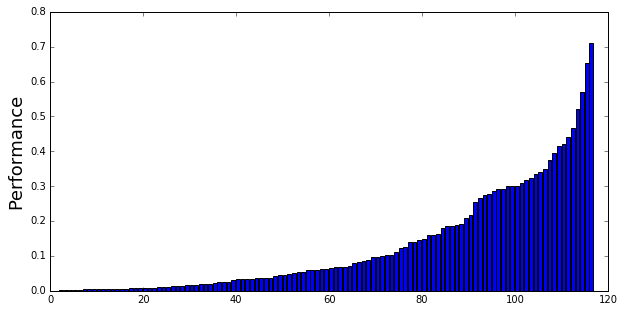

In [91]:
fig = plt.figure(figsize=(10, 5))
plt.bar(range(117), perf_arr[:, 0])
plt.ylabel('Performance', fontsize = 18)

In [92]:
data = cPickle.load(open('response_fcadd.pkl', 'r'))

In [93]:
data.shape

(79848, 117)

In [94]:
data_label = cPickle.load(open('response_label.pkl', 'r'))

In [95]:
data_label.shape

(79848,)

# Top1 confusion matrix related

In [127]:
top1_conmat = np.zeros([117, 117])

In [128]:
argmax_fcadd = np.argmax(data, 1)

In [130]:
for indx_tmp in xrange(len(data_label)):
    top1_conmat[int(data_label[indx_tmp]), int(argmax_fcadd[indx_tmp])] = top1_conmat[int(data_label[indx_tmp]), int(argmax_fcadd[indx_tmp])] + 1

In [131]:
top1_conmat

array([[ 32.,   0.,   0., ...,   0.,   0.,   1.],
       [  0.,  17.,   0., ...,   1.,   0.,   6.],
       [  1.,   1.,   3., ...,   0.,   3.,   0.],
       ..., 
       [  4.,   3.,   0., ...,   4.,   1.,   3.],
       [  3.,   0.,   1., ...,   0.,  15.,   0.],
       [  8.,   4.,   0., ...,   1.,   1.,   5.]])

In [132]:
perf_list

[(0.0, 9),
 (0.0, 61),
 (0.0013736263736263737, 81),
 (0.001736111111111111, 15),
 (0.0027472527472527475, 64),
 (0.0027472527472527475, 91),
 (0.002976190476190476, 30),
 (0.004120879120879121, 46),
 (0.004120879120879121, 63),
 (0.004120879120879121, 104),
 (0.005067567567567568, 23),
 (0.005208333333333333, 21),
 (0.005494505494505495, 36),
 (0.005494505494505495, 73),
 (0.005494505494505495, 114),
 (0.006048387096774193, 2),
 (0.006493506493506494, 26),
 (0.006868131868131868, 78),
 (0.006868131868131868, 108),
 (0.006868131868131868, 109),
 (0.006868131868131868, 116),
 (0.008241758241758242, 54),
 (0.008680555555555556, 22),
 (0.009615384615384616, 38),
 (0.009615384615384616, 112),
 (0.011904761904761904, 4),
 (0.012362637362637362, 44),
 (0.013719512195121951, 27),
 (0.015151515151515152, 10),
 (0.016483516483516484, 83),
 (0.017123287671232876, 20),
 (0.017857142857142856, 107),
 (0.018333333333333333, 24),
 (0.019230769230769232, 47),
 (0.020604395604395604, 115),
 (0.0233516

In [133]:
per_list_2 = []
for indx_tmp in xrange(117):
    per_list_2.append((top1_conmat[indx_tmp, indx_tmp]*1.0/np.sum(data_label==indx_tmp), indx_tmp))
    
per_list_2.sort()
print(per_list_2)

[(0.0, 9), (0.0, 61), (0.0013736263736263737, 81), (0.001736111111111111, 15), (0.0027472527472527475, 64), (0.0027472527472527475, 91), (0.002976190476190476, 30), (0.004120879120879121, 46), (0.004120879120879121, 63), (0.004120879120879121, 104), (0.0050675675675675678, 23), (0.005208333333333333, 21), (0.0054945054945054949, 36), (0.0054945054945054949, 73), (0.0054945054945054949, 114), (0.0060483870967741934, 2), (0.0064935064935064939, 26), (0.006868131868131868, 78), (0.006868131868131868, 108), (0.006868131868131868, 109), (0.006868131868131868, 116), (0.008241758241758242, 54), (0.0086805555555555559, 22), (0.0096153846153846159, 38), (0.0096153846153846159, 112), (0.011904761904761904, 4), (0.012362637362637362, 44), (0.013719512195121951, 27), (0.015151515151515152, 10), (0.016483516483516484, 83), (0.017123287671232876, 20), (0.017857142857142856, 107), (0.018333333333333333, 24), (0.019230769230769232, 47), (0.020604395604395604, 115), (0.023351648351648352, 75), (0.02389

In [139]:
name_list_top3 = []
for indx_tmp in xrange(117):
    curr_row = list(top1_conmat[indx_tmp])
    curr_row[indx_tmp] = 0
    new_row = sorted(enumerate(curr_row), key=lambda x: x[1])
    name_orig = cate_dict[indx_tmp]
    name_top3 = []
    for indx_tmp2 in xrange(3):
        name_top3.append((cate_dict[new_row[-1 - indx_tmp2][0]], 
                          int(new_row[-1 - indx_tmp2][1]*1.0/np.sum(data_label==indx_tmp)*10000)*1.0/10000))
    name_list_top3.append((int(top1_conmat[indx_tmp, indx_tmp]*1.0/np.sum(data_label==indx_tmp)*10000)*1.0/10000, name_orig, name_top3))
    
name_list_top3.sort()
#print(name_list_top3)
for item in name_list_top3:
    print(item)

(0.0, u'cruiser', [(u'convertible', 0.3543), (u'tender', 0.0837), (u'earphone', 0.0604)])
(0.0, u'drafting_table', [(u'console_table', 0.2859), (u'kitchen_table', 0.0984), (u'straight_chair', 0.089)])
(0.0013, u'sport_utility', [(u'convertible', 0.2953), (u'car', 0.0892), (u'earphone', 0.0837)])
(0.0017, u'ferry', [(u'tender', 0.2986), (u'cruise_ship', 0.1649), (u'knife', 0.0555)])
(0.0027, u'sedan', [(u'convertible', 0.2843), (u'boat', 0.0961), (u'tender', 0.0686)])
(0.0027, u'stove', [(u'vertical_file', 0.1195), (u'console_table', 0.0906), (u'microwave', 0.0618)])
(0.0029, u'pendulum_clock', [(u'console_table', 0.1101), (u'tender', 0.0535), (u'clock', 0.052)])
(0.0041, u'beach_wagon', [(u'convertible', 0.2472), (u'tender', 0.0796), (u'boat', 0.0755)])
(0.0041, u'file', [(u'vertical_file', 0.2733), (u'console_table', 0.1785), (u'tweeter', 0.0576)])
(0.0041, u'loudspeaker', [(u'vertical_file', 0.1785), (u'console_table', 0.1098), (u'tweeter', 0.0604)])
(0.005, u'cabin_cruiser', [(u'ten

# Top 5 confusion matrix related

In [142]:
top5_conmat = np.zeros([117, 117])
for indx_tmp in xrange(len(data_label)):
    curr_row = list(data[indx_tmp])
    new_row = sorted(enumerate(curr_row), key=lambda x: -x[1])
    for indx_tmp2 in xrange(5):
        top5_conmat[int(data_label[indx_tmp]), int(new_row[indx_tmp2][0])] = top5_conmat[int(data_label[indx_tmp]), int(new_row[indx_tmp2][0])] + 1

In [145]:
get_sort_top3(top5_conmat);

(0.0219, u'stove', [(u'console_table', 0.3173), (u'tweeter', 0.2802), (u'vertical_file', 0.2486)])
(0.026, u'beach_wagon', [(u'convertible', 0.4546), (u'car', 0.3461), (u'roadster', 0.32)])
(0.0267, u'pendulum_clock', [(u'console_table', 0.2678), (u'tender', 0.1592), (u'bookshelf', 0.1398)])
(0.0274, u'sport_utility', [(u'convertible', 0.5343), (u'car', 0.4368), (u'roadster', 0.3956)])
(0.0343, u'jeep', [(u'convertible', 0.3598), (u'roadster', 0.2829), (u'tender', 0.2046)])
(0.0456, u'upright', [(u'console_table', 0.5416), (u'cabinet', 0.25), (u'coffee_table', 0.246)])
(0.0467, u'printer', [(u'tweeter', 0.2486), (u'console_table', 0.2458), (u'vertical_file', 0.1936)])
(0.0486, u'ambulance', [(u'convertible', 0.4184), (u'roadster', 0.3263), (u'car', 0.2118)])
(0.0584, u'camera', [(u'convertible', 0.131), (u'tweeter', 0.1229), (u'mug', 0.1209)])
(0.0757, u'limousine', [(u'tender', 0.5587), (u'cruise_ship', 0.4981), (u'sea_boat', 0.3901)])
(0.0769, u'cruiser', [(u'convertible', 0.5837), (

In [146]:
print(cate_dict)

{0: u'cap', 1: u'table-tennis_table', 2: u'camera', 3: u'school_bus', 4: u'upright', 5: u'data_input_device', 6: u'floor_lamp', 7: u'folding_chair', 8: u'basket', 9: u'drafting_table', 10: u'limousine', 11: u'remote_control', 12: u'microphone', 13: u'grand_piano', 14: u'soda_can', 15: u'ferry', 16: u'birdhouse', 17: u'earphone', 18: u'kitchen_table', 19: u'lawn_chair', 20: u'platform_bed', 21: u'secretary', 22: u'ambulance', 23: u'cabin_cruiser', 24: u'coffee_mug', 25: u'pool_table', 26: u'stock_car', 27: u'bag', 28: u'dagger', 29: u'sea_boat', 30: u'pendulum_clock', 31: u'vertical_file', 32: u'roadster', 33: u'rocking_chair', 34: u'dishwasher', 35: u'mailbox', 36: u'jeep', 37: u'pillow', 38: u'piano', 39: u'convertible', 40: u'monitor', 41: u'jar', 42: u'sailboat', 43: u'delta_wing', 44: u'love_seat', 45: u'cruise_ship', 46: u'beach_wagon', 47: u'yacht', 48: u'revolver', 49: u'mug', 50: u'berth', 51: u'wine_bottle', 52: u'propeller_plane', 53: u'helmet', 54: u'printer', 55: u'microwav

# Old script for draw things

In [97]:
num_cate = 117

In [96]:
aggre_arr = np.zeros([num_cate, num_cate])

In [98]:
for data_indx in xrange(data_label.size):
    label_now = int(data_label[data_indx])
    aggre_arr[label_now] = aggre_arr[label_now] + data[data_indx]

for label_now in xrange(num_cate):
    aggre_arr[label_now] = aggre_arr[label_now]/np.sum(data_label==label_now)
    

In [99]:
dis_matrix = 1 - np.corrcoef(aggre_arr)

In [100]:
dis_matrix.shape

(117, 117)

In [104]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=0,
                   dissimilarity="precomputed", n_jobs=1)

In [105]:
pos = mds.fit(dis_matrix).embedding_

In [106]:
pos.shape

(117, 2)

In [161]:
cate_info_path = '../cmd_gen_mp4/category_info.txt'

fin = open(cate_info_path, 'r')
lines = fin.readlines()

cate_dict = {}

for line in lines:
    split_line = line.split()
    indx_cate_now = int(split_line[0])
    label_inter = split_line[1]
    if label_inter[0]=='[':
        label_int = int(label_inter[3:11])
    else:
        label_int = int(label_inter[1:])
    
    syn_now = wn._synset_from_pos_and_offset('n',label_int)
    cate_dict[indx_cate_now] = syn_now.name().split('.')[0]

In [117]:
cate_dict

{0: u'cap',
 1: u'table-tennis_table',
 2: u'camera',
 3: u'school_bus',
 4: u'upright',
 5: u'data_input_device',
 6: u'floor_lamp',
 7: u'folding_chair',
 8: u'basket',
 9: u'drafting_table',
 10: u'limousine',
 11: u'remote_control',
 12: u'microphone',
 13: u'grand_piano',
 14: u'soda_can',
 15: u'ferry',
 16: u'birdhouse',
 17: u'earphone',
 18: u'kitchen_table',
 19: u'lawn_chair',
 20: u'platform_bed',
 21: u'secretary',
 22: u'ambulance',
 23: u'cabin_cruiser',
 24: u'coffee_mug',
 25: u'pool_table',
 26: u'stock_car',
 27: u'bag',
 28: u'dagger',
 29: u'sea_boat',
 30: u'pendulum_clock',
 31: u'vertical_file',
 32: u'roadster',
 33: u'rocking_chair',
 34: u'dishwasher',
 35: u'mailbox',
 36: u'jeep',
 37: u'pillow',
 38: u'piano',
 39: u'convertible',
 40: u'monitor',
 41: u'jar',
 42: u'sailboat',
 43: u'delta_wing',
 44: u'love_seat',
 45: u'cruise_ship',
 46: u'beach_wagon',
 47: u'yacht',
 48: u'revolver',
 49: u'mug',
 50: u'berth',
 51: u'wine_bottle',
 52: u'propeller_p

In [125]:
for item_tmp in perf_list:
    cate_tmp = item_tmp[1]
    print(cate_dict[cate_tmp], item_tmp[0])

(u'drafting_table', 0.0)
(u'cruiser', 0.0)
(u'sport_utility', 0.0013736263736263737)
(u'ferry', 0.001736111111111111)
(u'stove', 0.0027472527472527475)
(u'sedan', 0.0027472527472527475)
(u'pendulum_clock', 0.002976190476190476)
(u'beach_wagon', 0.004120879120879121)
(u'file', 0.004120879120879121)
(u'loudspeaker', 0.004120879120879121)
(u'cabin_cruiser', 0.005067567567567568)
(u'secretary', 0.005208333333333333)
(u'jeep', 0.005494505494505495)
(u'planter', 0.005494505494505495)
(u'chair', 0.005494505494505495)
(u'camera', 0.006048387096774193)
(u'stock_car', 0.006493506493506494)
(u'racer', 0.006868131868131868)
(u'rifle', 0.006868131868131868)
(u'desk', 0.006868131868131868)
(u'table', 0.006868131868131868)
(u'printer', 0.008241758241758242)
(u'ambulance', 0.008680555555555556)
(u'piano', 0.009615384615384616)
(u'lamp', 0.009615384615384616)
(u'upright', 0.011904761904761904)
(u'love_seat', 0.012362637362637362)
(u'bag', 0.013719512195121951)
(u'limousine', 0.015151515151515152)
(u'ea

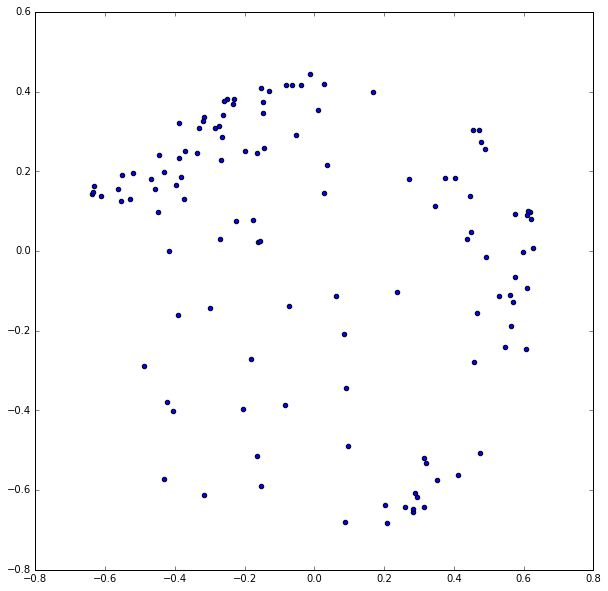

In [120]:

fig = plt.figure(figsize=(10, 10))
plt.scatter(pos[:, 0], pos[:, 1])

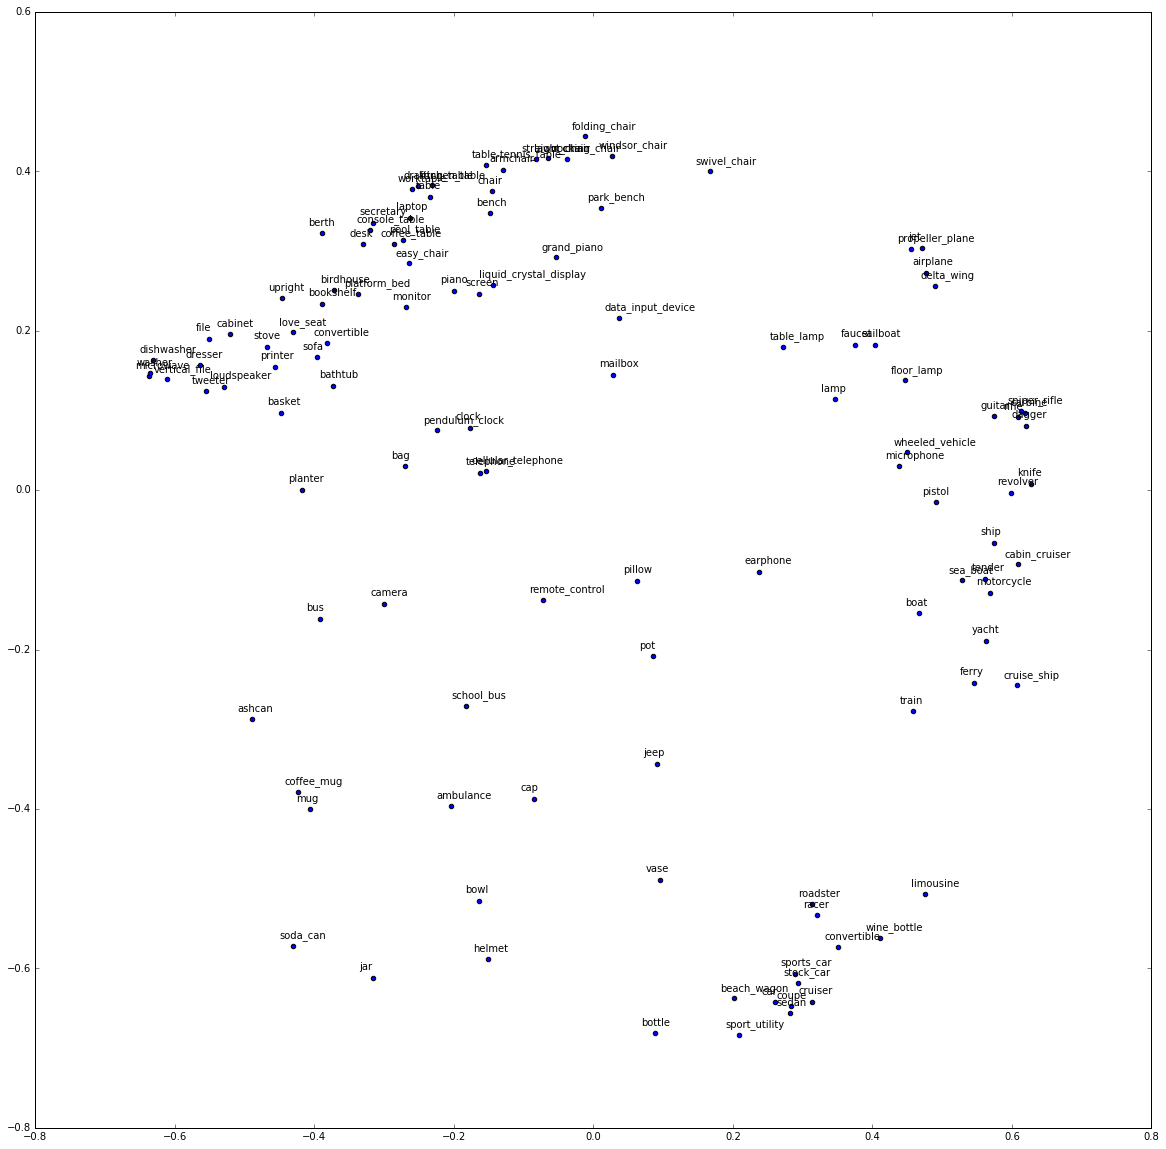

In [122]:

fig = plt.figure(figsize=(20, 20))
plt.scatter(pos[:, 0], pos[:, 1])
for indx_cate in xrange(num_cate):
    plt.text(pos[indx_cate, 0] - 0.02, pos[indx_cate, 1] + 0.01, cate_dict[indx_cate])

# Visualize the RDM

In [176]:
def load_and_show_one(path_to_mat, with_rename = None, remap_arr = None):
    dis_mat = cPickle.load(open(path_to_mat, 'r'))
    if not with_rename is None:
        if remap_arr is None:
            remap_arr = range(np.max(with_rename))
        #new_order = sorted(range(len(with_rename)),key=lambda x:with_rename[x])
        new_order = sorted(range(len(with_rename)),key=lambda x:remap_arr.index(with_rename[x]))
        
        help_order = sorted(with_rename, key=lambda x:remap_arr[x])
        #for indx, which in enumerate(help_order):
        #    print(indx, which)
        
        new_dis_mat = np.zeros(dis_mat.shape)
        for nindx_x, ind_x in enumerate(new_order):
            for nindx_y, ind_y in enumerate(new_order):
                new_dis_mat[nindx_x, nindx_y] = dis_mat[ind_x, ind_y]
        
        dis_mat = new_dis_mat
        
    #plt.matshow(dis_mat, vmin=0, vmax=1.5, cmap='jet', aspect='auto', fignum = False)
    plt.matshow(dis_mat, cmap='jet', aspect='auto', fignum = False)
    plt.colorbar()    

def load_and_show(path_to_mat, with_rename = None, fig_size = (13, 15), remap_arr = None, 
                 subplot_sug = None, list_var = None, save_fig = None):
    fig = plt.figure(figsize=fig_size)
    if list_var is None:
        load_and_show_one(path_to_mat, with_rename = with_rename, remap_arr = remap_arr)
    else:
        subplot_config = subplot_sug if not subplot_sug is None else [len(list_var)]
        for nindx, indx_tmp in enumerate(list_var):
            plt.subplot(*(subplot_config + [nindx+1]))
            load_and_show_one(path_to_mat % indx_tmp,  with_rename = with_rename, remap_arr = remap_arr)

    if not save_fig is None:

        from matplotlib.backends.backend_pdf import PdfPages
        pp = PdfPages(save_fig)
        #plt.savefig(pp, format='pdf')
        pp.savefig(fig, bbox_inches='tight')
        pp.close()

In [8]:
dis_mat = cPickle.load(open('/mnt/data/chengxuz/barrel/val_RDMs/spatemp_RDMs/RDM_fc7_0.pkl', 'r'))

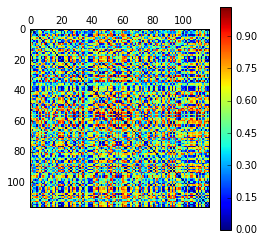

In [22]:
plt.matshow(dis_mat)
plt.colorbar()

In [27]:
dis_mat_2 = cPickle.load(open('/mnt/data/chengxuz/barrel/val_RDMs/spatemp_RDMs/RDM_fc6_0.pkl', 'r'))

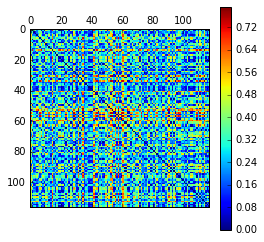

In [28]:
plt.matshow(dis_mat_2)
plt.colorbar()

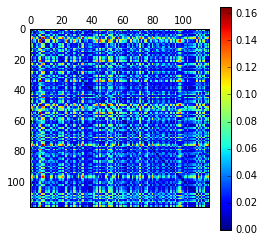

In [30]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs/RDM_conv1_0.pkl')

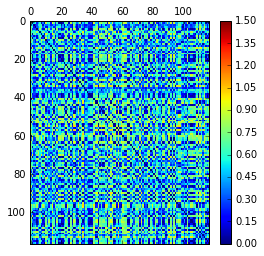

In [137]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/spatemp_RDMs/RDM_fc7_0.pkl')

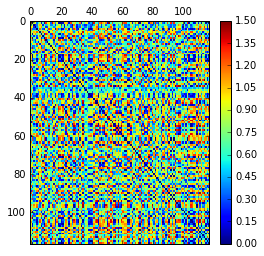

In [139]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs/RDM_fc12_0.pkl')

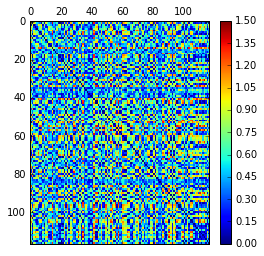

In [129]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/fdb_RDMs/RDM_fc8_12.pkl')

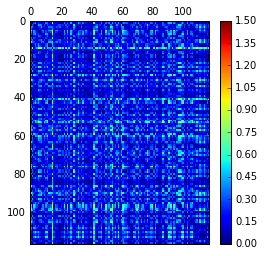

In [130]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/tnn_RDMs/RDM_fc8_12.pkl')

# Recalculate the confusion matrix

In [202]:
import h5py
fin = h5py.File('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_responses_add.hdf5')

In [203]:
fin.keys()

[u'fc_add_0', u'label']

In [204]:
label = np.asarray(fin['label'])
data = np.asarray(fin['fc_add_0'])

In [10]:
data.shape

(79848, 117)

In [11]:
data_label = label

In [12]:
top1_conmat = np.zeros([117, 117])

In [13]:
argmax_fcadd = np.argmax(data, 1)

In [14]:
for indx_tmp in xrange(len(data_label)):
    top1_conmat[int(data_label[indx_tmp]), int(argmax_fcadd[indx_tmp])] = top1_conmat[int(data_label[indx_tmp]), int(argmax_fcadd[indx_tmp])] + 1

In [15]:
top1_conmat

array([[ 37.,   3.,   0., ...,   0.,   0.,   2.],
       [  0.,  52.,   0., ...,   0.,   0.,   3.],
       [  0.,   1.,  17., ...,   0.,   1.,   0.],
       ..., 
       [  1.,   9.,   1., ...,  20.,   1.,  13.],
       [  0.,   6.,   3., ...,   0.,  22.,   1.],
       [  2.,  19.,   0., ...,   4.,   1.,  26.]])

In [16]:
np.sum(argmax_fcadd==data_label)*1.0/len(data_label)

0.14555154794108807

In [29]:
import matplotlib
def show_conmat_grouped(conmat, with_rename = ret_res, fig_size=(12,10), remap_arr = [0,1,7,3,6,4,2,5,8,9], cmap = 'jet'):
    # normalize conmat
    new_conmat = np.zeros(conmat.shape)
    for indx_i in xrange(conmat.shape[0]):
        sum_now = np.sum(conmat[indx_i, :])
        
        for indx_j in xrange(conmat.shape[1]):
            new_conmat[indx_i, indx_j] = conmat[indx_i, indx_j]*1.0/sum_now
            
    if not with_rename is None:
        if remap_arr is None:
            remap_arr = range(np.max(with_rename))
        #new_order = sorted(range(len(with_rename)),key=lambda x:with_rename[x])
        new_order = sorted(range(len(with_rename)),key=lambda x:remap_arr.index(with_rename[x]))
        
        #help_order = sorted(with_rename, key=lambda x:remap_arr[x])
        #for indx, which in enumerate(help_order):
        #    print(indx, which)
        
        connet_remap = np.zeros(new_conmat.shape)
        for nindx_x, ind_x in enumerate(new_order):
            for nindx_y, ind_y in enumerate(new_order):
                connet_remap[nindx_x, nindx_y] = new_conmat[ind_x, ind_y]
        
        new_conmat = (connet_remap + connet_remap.transpose())/2
        
    fig, axs = plt.subplots(1,1,figsize=fig_size)
    cax = axs.matshow(new_conmat, cmap=cmap, aspect='auto')
    cbar = fig.colorbar(cax)    
    matplotlib.rcParams.update({'font.size': 20})
    axs.axis('off')

    nplots = 50

    fig.canvas.draw()

    box = axs._position.bounds

    #print(box)
    tmpax = fig.add_axes(box)
    tmpax.set_axis_off()
    tmpax.set_xlim([0, 117])
    tmpax.set_ylim([0, 117])
    
    boundaries = [np.sum(with_rename==v) for v in remap_arr]
    acc_boundaries = [np.sum(boundaries[:(i+1)]) for i,_ in enumerate(boundaries[:-1])]
    #print(boundaries)
    #print(acc_boundaries)
    
    for indx, boundary in enumerate(acc_boundaries):
        
        if indx>0:
            prev_boundary = acc_boundaries[indx-1]
        else:
            prev_boundary = 0
        
        if indx<len(acc_boundaries)-1:
            next_boundary = acc_boundaries[indx+1] + 1
        else:
            next_boundary = 118
        tmpax.plot(range(prev_boundary, next_boundary), 117 - boundary*np.ones(next_boundary - prev_boundary), color='w')
        #tmpax.plot(range(0, next_boundary), 117 - boundary*np.ones(next_boundary - 0), color='w')
        #tmpax.plot(boundary*np.ones(next_boundary - prev_boundary), 117 - np.arange(prev_boundary, next_boundary), color='w')
        tmpax.plot(boundary*np.ones(next_boundary - 0), 117 - np.arange(0, next_boundary), color='w')
        
        
        
        
    for nindx, which_cat in enumerate(remap_arr):
        all_names = [cate_dict[ind] for ind, v in enumerate(ret_res) if v==which_cat]
        all_name_str = all_names[0]
        for name_tmp in all_names[1:]:
            all_name_str = all_name_str + ',' + name_tmp
        print("Group %i: %s" % (nindx, all_name_str))
        


    from matplotlib.backends.backend_pdf import PdfPages
    pp = PdfPages('confusion.pdf')
    #plt.savefig(pp, format='pdf')
    pp.savefig(fig, bbox_inches='tight')
    pp.close()        
        

Group 0: table-tennis_table,folding_chair,grand_piano,lawn_chair,rocking_chair,windsor_chair,swivel_chair,park_bench,armchair,straight_chair,chair
Group 1: drafting_table,kitchen_table,secretary,pool_table,piano,berth,worktable,console_table,easy_chair,laptop,bench,coffee_table,desk,table
Group 2: upright,basket,birdhouse,platform_bed,vertical_file,dishwasher,convertible,monitor,love_seat,printer,microwave,washer,file,stove,bookshelf,dresser,tweeter,bathtub,loudspeaker,cabinet,sofa
Group 3: camera,school_bus,bag,pendulum_clock,mailbox,planter,bus
Group 4: floor_lamp,dagger,delta_wing,revolver,propeller_plane,carbine,knife,sniper_rifle,guitar,rifle,airplane,jet
Group 5: ferry,cabin_cruiser,sea_boat,cruise_ship,yacht,wheeled_vehicle,pistol,ship,tender,train,boat
Group 6: limousine,ambulance,stock_car,roadster,jeep,beach_wagon,wine_bottle,cruiser,sports_car,convertible,bottle,racer,sport_utility,sedan,coupe,car
Group 7: cap,soda_can,coffee_mug,jar,mug,helmet,bowl,pot,ashcan,vase
Group 8: 

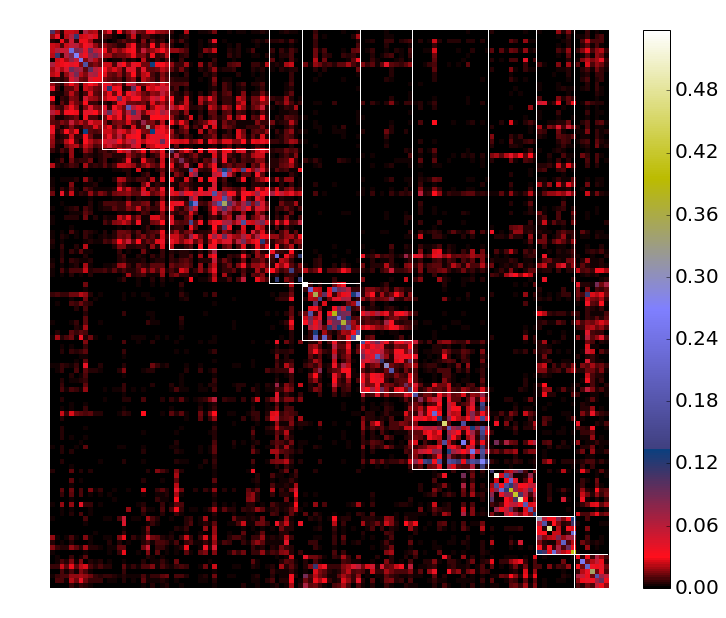

In [517]:
#Oranges
#gist_yarg
#Paired
#terrain
#gist_stern
#nipy_spectral
#RdGy

show_conmat_grouped(top1_conmat, cmap = 'gist_stern', fig_size=(0.775/0.62*10,10))

In [433]:
cmaps = ['viridis', 'plasma', 'inferno', 'magma',
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper',
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c',
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']
iter_list = iter(cmaps)


In [396]:
now_cmap = next(iter_list)
print(now_cmap)
show_conmat_grouped(top1_conmat, cmap = now_cmap)

StopIteration: 

Oranges
gist_yarg
Paired
terrain
gist_stern
nipy_spectral



In [509]:
[cate_dict[ind] for ind, v in enumerate(ret_res) if v==0]

[u'table-tennis_table',
 u'folding_chair',
 u'grand_piano',
 u'lawn_chair',
 u'rocking_chair',
 u'windsor_chair',
 u'swivel_chair',
 u'park_bench',
 u'armchair',
 u'straight_chair',
 u'chair']

# Statistics for category

In [205]:
label.shape

(79848,)

In [208]:
num_objcat = [np.sum(label==v)/8 for v in xrange(117)]

In [212]:
print(np.median(num_objcat))
print(np.mean(num_objcat))
print(np.std(num_objcat))

91.0
85.3076923077
10.2327290713


# Do other drawings

In [540]:
# Load speed and scale array

dir_hdf5 = '/mnt/data/chengxuz/barrel/responses_otherlabels.hdf5'

fin_hdf5 = h5py.File(dir_hdf5, 'r')
scale_arr = np.asarray(fin_hdf5['scale'])
scale_arr = scale_arr[:, 3]

speed_arr = np.asarray(fin_hdf5['speed'])
speed_arr = speed_arr[:, :3]

speed_norm = np.zeros([speed_arr.shape[0]])
for indx in xrange(speed_arr.shape[0]):
    speed_norm[indx] = np.linalg.norm(speed_arr[indx, :])

speed_arr = speed_norm

In [559]:
def get_perf_range(range_arr, start_i, end_i, argmax_fcadd, data_label):
    sample_arr = (range_arr < end_i) & (range_arr > start_i )

    return np.sum(argmax_fcadd[sample_arr]==data_label[sample_arr])*1.0/np.sum(sample_arr)

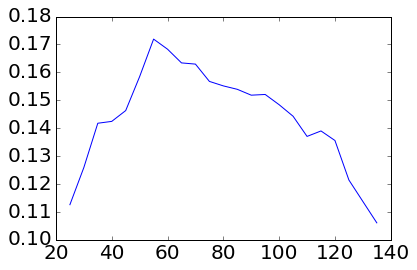

In [561]:
x_pos = np.arange(25, 140, 5)

perf_scale = [get_perf_range(scale_arr, v-5, v+5, argmax_fcadd, data_label) for v in x_pos]
plt.plot(x_pos, perf_scale)

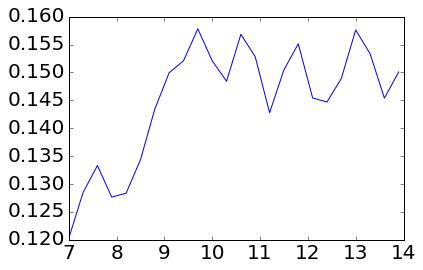

In [562]:
x_pos = np.arange(7, 14, 0.3)

perf_scale = [get_perf_range(speed_arr, v-0.3, v+0.3, argmax_fcadd, data_label) for v in x_pos]
plt.plot(x_pos, perf_scale)

In [547]:
sample_arr = speed_arr > 13

np.sum(argmax_fcadd[sample_arr]==data_label[sample_arr])*1.0/np.sum(sample_arr)

0.15203651685393257

In [563]:
fcadd_fdb = cPickle.load(open('/mnt/data/chengxuz/barrel/fdb_fcadd.pkl', 'r'))

In [568]:
fcadd_fdb.shape

(79848, 117)

In [569]:
fdb_argmax_fcadd = np.argmax(fcadd_fdb, 1)

In [570]:
fdb_argmax_fcadd.shape

(79848,)

In [571]:
np.sum(fdb_argmax_fcadd==data_label)*1.0/len(data_label)

0.14358531209297665

In [576]:
np.sum(argmax_fcadd==data_label)*1.0/len(data_label)

0.14555154794108807

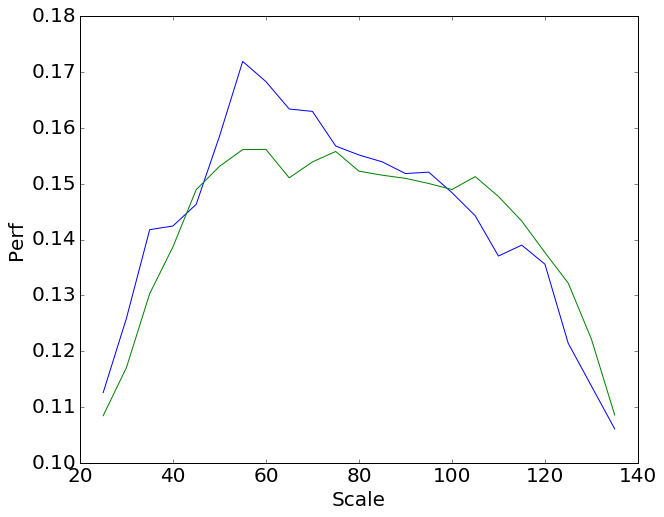

In [578]:
fig = plt.figure(figsize=(10, 8))

x_pos = np.arange(25, 140, 5)

perf_scale = [get_perf_range(scale_arr, v-5, v+5, argmax_fcadd, data_label) for v in x_pos]
plt.plot(x_pos, perf_scale)

x_pos = np.arange(25, 140, 5)

perf_scale = [get_perf_range(scale_arr, v-5, v+5, fdb_argmax_fcadd, data_label) for v in x_pos]
plt.plot(x_pos, perf_scale)

plt.xlabel('Scale')
plt.ylabel('Perf')

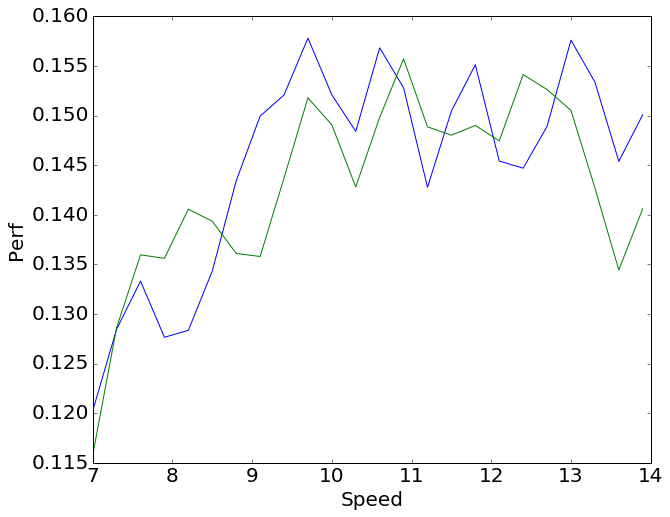

In [579]:
fig = plt.figure(figsize=(10, 8))

x_pos = np.arange(7, 14, 0.3)

perf_scale = [get_perf_range(speed_arr, v-0.3, v+0.3, argmax_fcadd, data_label) for v in x_pos]
plt.plot(x_pos, perf_scale)

x_pos = np.arange(7, 14, 0.3)

perf_scale = [get_perf_range(speed_arr, v-0.3, v+0.3, fdb_argmax_fcadd, data_label) for v in x_pos]
plt.plot(x_pos, perf_scale)

plt.xlabel('Speed')
plt.ylabel('Perf')

# Embeding RDM

In [18]:
ALL_DATA_DICT = {}

In [51]:
import copy

def load_or_fetch(file_path, key_value = 'RDM', all_dict = ALL_DATA_DICT):
    if file_path not in all_dict:
        fin = h5py.File(file_path, 'r')
        print("Load %s" % file_path)
        all_dict[file_path] = np.asarray(fin[key_value])
        fin.close()
    
    return all_dict[file_path]

def draw_RDM_embeding(file_groups, setting_groups, sample_num = None, sample_group_num = 1, file_type = 0, 
                      random_group = [0], figsize = (12,10)):
    assert len(file_groups)==len(setting_groups), 'File and setting should be the same length'
    
    all_RDM = []
    line_group = []
    
    if not sample_num is None:
        assert file_type==1, 'Use hdf5!'
        assert len(random_group)==sample_group_num, 'Send in enough random state!'
    
    for file_group, setting_group in zip(file_groups, setting_groups):
        for random_seed_now in random_group:
            line_dict = {'setting': copy.deepcopy(setting_group), 'indx_list': []}

            if not sample_num is None:
                sample_arr = np.random.RandomState(random_seed_now).permutation(9981)[:sample_num]
            for now_file in file_group:
                if file_type==0:
                    all_RDM.append(cPickle.load(open(now_file, 'r')))
                else:
                    large_array = load_or_fetch(now_file)
                    if not sample_num is None:
                        large_array = large_array[sample_arr, :]
                        large_array = large_array[:, sample_arr]
                    all_RDM.append(large_array)
                    
                line_dict['indx_list'].append(len(all_RDM)-1)

            line_group.append(line_dict)
    
    all_RDM_arr = np.asarray(all_RDM)
    
    all_RDM_arr = all_RDM_arr.reshape([all_RDM_arr.shape[0], -1])
    
    dis_mat = 1 - np.corrcoef(all_RDM_arr)
    #print(dis_mat)
    
    
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=0,
                   dissimilarity="precomputed", n_jobs=1)
    pos_now = mds.fit(dis_mat).embedding_
    
    fig, axs = plt.subplots(1,1,figsize=figsize)
    
    for line_dict in line_group:
        setting_group = line_dict['setting']
        indx_list = line_dict['indx_list']
        
        x_now = pos_now[indx_list, 0]
        y_now = pos_now[indx_list, 1]
        
        axs.plot(x_now, y_now, c = setting_group['c'], markersize= 1)
        
        color_array = [tuple(np.asarray(setting_group['c'])*((nindx+1)*1.0/len(indx_list))) for nindx in xrange(len(indx_list))]
        setting_group.update({'c': color_array})
        axs.scatter(x_now, y_now, edgecolors='none', **setting_group)
    
    return dis_mat

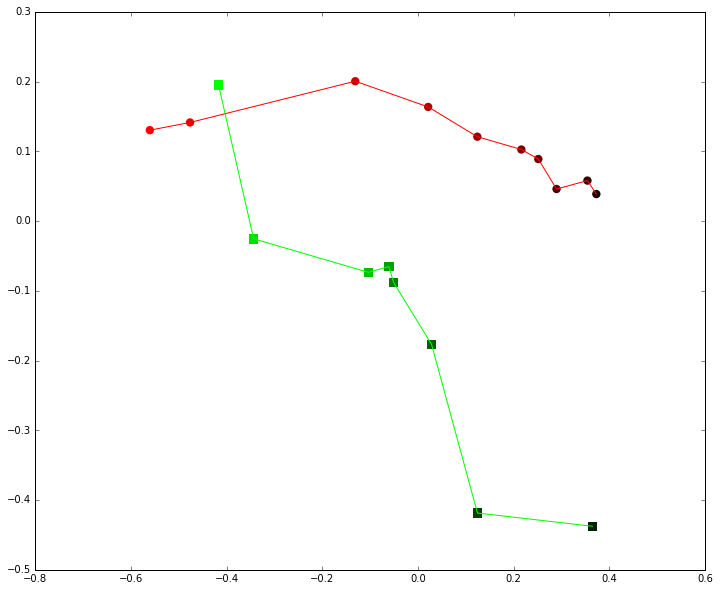

In [52]:
#temp_spa_list = ['conv1_0', 'conv2_0', 'conv3_0', 'conv4_0', 'conv5_0', 'conv6_0', 
#                 'conv7_0', 'conv8_0', 'conv9_0', 'conv10_0', 'fc11_0', 'fc12_0']
#temp_spa_path_list = [os.path.join('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs', 'RDM_%s.pkl' % v) for v in temp_spa_list]
temp_spa_list = ['conv1_0', 'conv3_0', 'conv5_0', 'conv6_0', 
                 'conv7_0', 'conv8_0', 'conv9_0', 'conv10_0', 'fc11_0', 'fc12_0']
temp_spa_path_list = [os.path.join('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs_obj/', 'RDM_%s.hdf5' % v) for v in temp_spa_list]

temp_spa_setting = {'c': (1,0,0), 'marker': 'o', 's': 70}

fdb_list = ['conv1_21', 'conv2_21', 'conv3_21', 'conv4_21', 'conv5_21', 'conv6_21', 'fc7_21', 'fc8_21']
#fdb_path_list = [os.path.join('/mnt/data/chengxuz/barrel/val_RDMs/fdb_RDMs/', 'RDM_%s.pkl' % v) for v in fdb_list]
fdb_path_list = [os.path.join('/mnt/data/chengxuz/barrel/val_RDMs/fdb_RDMs_obj/', 'RDM_%s.hdf5' % v) for v in fdb_list]
fdb_setting = {'c': (0,1,0), 'marker': ',', 's': 90}

sample_group_num = 1
#draw_RDM_embeding([temp_spa_path_list, fdb_path_list], [temp_spa_setting, fdb_setting], sample_num=None, 
#                  sample_group_num=sample_group_num, file_type=0, random_group=range(sample_group_num))
dis_mat_objRDM = draw_RDM_embeding([temp_spa_path_list, fdb_path_list], [temp_spa_setting, fdb_setting], sample_num=None, 
                  sample_group_num=sample_group_num, file_type=1, random_group=range(sample_group_num))

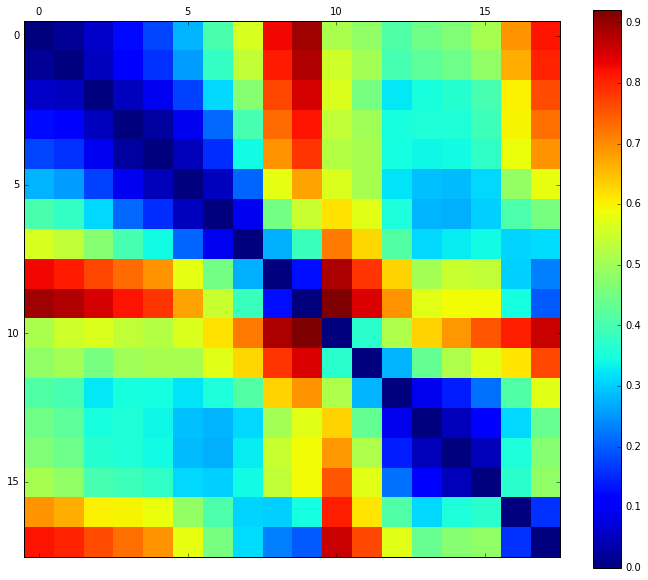

In [53]:
fig, axes =  plt.subplots(1,1,figsize=(12, 10))
cax = axes.matshow(dis_mat_objRDM)
cbar = fig.colorbar(cax)

# Embedding from distance matrix precomputed

In [226]:
import copy
import matplotlib.lines as mlines

def draw_RDM_embeding_pre(file_groups, setting_groups, pre_path = '/mnt/data/chengxuz/barrel/all_dismat.pkl', 
                          figsize = (12,10), mds_random_state = 0):
    assert len(file_groups)==len(setting_groups), 'File and setting should be the same length'
    
    res_dict = cPickle.load(open(pre_path, 'r'))
    all_filelist = res_dict['file_list']
    all_dismat = res_dict['dismat']
    file_used = []
    line_group = []
    
    for file_group, setting_group in zip(file_groups, setting_groups):

        line_dict = {'setting': copy.deepcopy(setting_group), 'indx_list': []}

        for now_file in file_group:
            assert now_file in all_filelist, "%s must be in the file list stored!" % now_file
            file_used.append(now_file)
            line_dict['indx_list'].append(len(file_used)-1)

        line_group.append(line_dict)
    
    now_dismat = np.zeros([len(file_used), len(file_used)])
    
    for xindx in xrange(len(file_used)):
        for yindx in xrange(len(file_used)):
            #print(xindx, yindx)
            now_dismat[xindx, yindx] = all_dismat[all_filelist.index(file_used[xindx]), 
                                            all_filelist.index(file_used[yindx])]
    
    
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=mds_random_state,
                   dissimilarity="precomputed", n_jobs=1)
    #pos_now = mds.fit(dis_mat).embedding_
    pos_now = mds.fit(now_dismat).embedding_    
    
    fig, axs = plt.subplots(1,1,figsize=figsize)
    
    all_lines = []
    all_labels = []
    
    for line_dict in line_group:
        setting_group = line_dict['setting']
        indx_list = line_dict['indx_list']
        
        x_now = pos_now[indx_list, 0]
        y_now = pos_now[indx_list, 1]
        
        color_array = [tuple(np.asarray(setting_group['c'])*((nindx+1)*1.0/len(indx_list))) for nindx in xrange(len(indx_list))]
        
        #line_tmp, = axs.plot(x_now, y_now, c = setting_group['c'], markersize= 10)
        for tmp_plot_indx in xrange(len(x_now)-1):
            axs.plot(x_now[tmp_plot_indx:tmp_plot_indx+2], y_now[tmp_plot_indx:tmp_plot_indx+2], 
                     c  = color_array[tmp_plot_indx])
        if setting_group.get('add_label', True):
            #all_lines.append(line_tmp)
            blue_line = mlines.Line2D([], [], color=setting_group['c'], marker=setting_group['marker'],
                          markersize=10)
            all_lines.append(blue_line)            
            all_labels.append(setting_group.get('label', 'Test'))
        
        setting_group.update({'c': color_array})
        if 'add_label' in setting_group:
            setting_group.pop('add_label')
        axs.scatter(x_now, y_now, edgecolors='none', **setting_group)
    
    axs.legend(all_lines, all_labels, fontsize=15)
    #axs.set_axis_off()
    axs.set_xticklabels(())
    axs.set_yticklabels(())    
    
    from matplotlib.backends.backend_pdf import PdfPages
    pp = PdfPages('MDS_embedding.pdf')
    #plt.savefig(pp, format='pdf')
    pp.savefig(fig, bbox_inches='tight')
    pp.close()
    
    return dis_mat

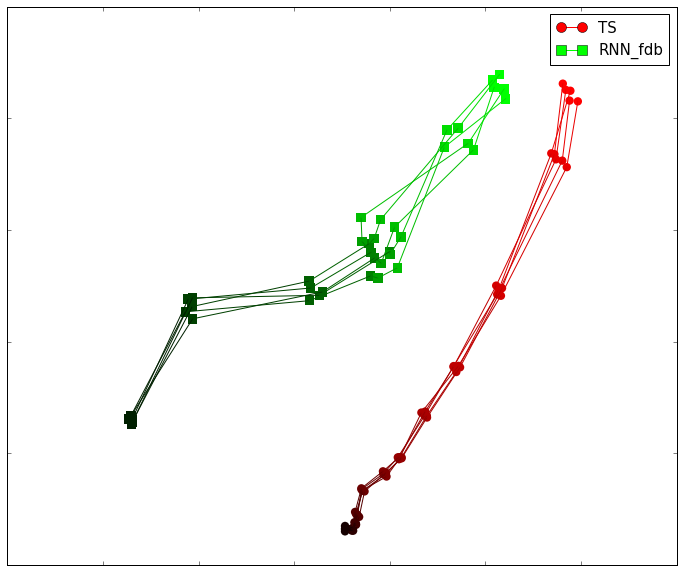

In [227]:
all_path_list = []
all_setting_list = []

for seed in xrange(5):
    temp_spa_list = ['conv1_0', 'conv2_0', 'conv3_0', 'conv4_0', 'conv5_0', 'conv6_0', 
                     'conv7_0', 'conv8_0', 'conv9_0', 'conv10_0', 'fc11_0', 'fc12_0']
    temp_spa_path_list = [os.path.join('/mnt/fs0/chengxuz/Data/nd_response/temp_spa_RDMs_s%i_obj/' % seed, 
                                       'RDM_%s.hdf5' % v) for v in temp_spa_list]

    temp_spa_setting = {'c': (1,0,0), 'marker': 'o', 's': 70, 'label': 'TS'}
    if seed>0:
        temp_spa_setting['add_label'] = False
    
    all_path_list.append(temp_spa_path_list)
    all_setting_list.append(temp_spa_setting)

for seed in xrange(5):
    fdb_list = ['conv1_21', 'conv2_21', 'conv3_21', 'conv4_21', 'conv5_21', 
                'conv6_21', 'fc7_21', 'fc8_21']
    fdb_path_list = [os.path.join('/mnt/fs0/chengxuz/Data/nd_response/fdb_RDMs_s%i_obj/' % seed, 'RDM_%s.hdf5' % v) for v in fdb_list]
    fdb_setting = {'c': (0,1,0), 'marker': 's', 's': 90, 'label': 'RNN_fdb'}
    
    if seed>0:
        fdb_setting['add_label'] = False
    
    all_path_list.append(fdb_path_list)
    all_setting_list.append(fdb_setting)

spatemp_list = ['conv1_0', 'conv2_0', 'conv3_0', 'conv4_0', 'conv5_0', 
            'fc6_0', 'fc7_0']
spatemp_path_list = [os.path.join('/mnt/fs0/chengxuz/Data/nd_response/spatemp_sm2_RDMs_obj/', 'RDM_%s.hdf5' % v) for v in spatemp_list]
spatemp_setting = {'c': (0,0,1), 'marker': '*', 's': 130, 'label': 'BM'}

#all_path_list.append(spatemp_path_list)
#all_setting_list.append(spatemp_setting)


spa_temp_list = ['conv1_11_22', 'conv2_11_22', 'conv3_11_22', 'conv4_11_22', 'conv5_11_22', 'conv6_11_22',
                'conv7_0', 'conv8_0', 'conv9_0', 'conv10_0', 'conv11_0', 'conv12_0',
                'fc13_0']
spa_temp_path_list = [os.path.join('/mnt/fs0/chengxuz/Data/nd_response/spa_temp_RDMs_obj/', 'RDM_%s.hdf5' % v) for v in spa_temp_list]
spa_temp_setting = {'c': (0,1,1), 'marker': 'v', 's': 90, 'label': 'ST'}

#all_path_list.append(spa_temp_path_list)
#all_setting_list.append(spa_temp_setting)

fdb_ave_list = ['conv1_11_22', 'conv2_11_22', 'conv3_11_22', 'conv4_11_22', 'conv5_11_22', 
            'conv6_11_22', 'fc7_11_22', 'fc8_11_22']
fdb_ave_path_list = [os.path.join('/mnt/fs0/chengxuz/Data/nd_response/fdb_RDMs_obj/', 'RDM_%s.hdf5' % v) for v in fdb_ave_list]
fdb_ave_setting = {'c': (1,1,0), 'marker': '^', 's': 90, 'label': 'fdb_ave'}

#all_path_list.append(fdb_ave_path_list)
#all_setting_list.append(fdb_ave_setting)

fdb_concat_list = ['conv1_concat11_22', 'conv2_concat11_22', 'conv3_concat11_22', 'conv4_concat11_22', 'conv5_concat11_22', 
            'conv6_concat11_22', 'fc7_concat11_22', 'fc8_concat11_22']
fdb_concat_path_list = [os.path.join('/mnt/fs0/chengxuz/Data/nd_response/fdb_RDMs_obj/', 'RDM_%s.hdf5' % v) for v in fdb_concat_list]
fdb_concat_setting = {'c': (1,0,1), 'marker': 'p', 's': 90, 'label': 'fdb_concat'}

#all_path_list.append(fdb_concat_path_list)
#all_setting_list.append(fdb_concat_setting)


spa_temp_concat_list = ['conv1_concat0_22', 'conv2_concat0_22', 'conv3_concat0_22', 'conv4_concat0_22', 'conv5_concat0_22', 'conv6_concat0_22',
                'conv7_0', 'conv8_0', 'conv9_0', 'conv10_0', 'conv11_0', 'conv12_0',
                'fc13_0']
spa_temp_concat_path_list = [os.path.join('/mnt/fs0/chengxuz/Data/nd_response/spa_temp_RDMs_obj/', 'RDM_%s.hdf5' % v) for v in spa_temp_concat_list]
spa_temp_concat_setting = {'c': (0,1,1), 'marker': 'v', 's': 90, 'label': 'ST_concat'}

#all_path_list.append(spa_temp_concat_path_list)
#all_setting_list.append(spa_temp_concat_setting)


#dis_mat_objRDM = draw_RDM_embeding_pre(all_path_list, all_setting_list, mds_random_state = 1, pre_path = '/mnt/data/chengxuz/barrel/all_dismat_concat.pkl')
dis_mat_objRDM = draw_RDM_embeding_pre(all_path_list, all_setting_list, mds_random_state = 6, pre_path = '/mnt/data/chengxuz/barrel/all_dismat_noise.pkl')


In [52]:
4*6*512*11

135168

In [161]:
seed_now = 4

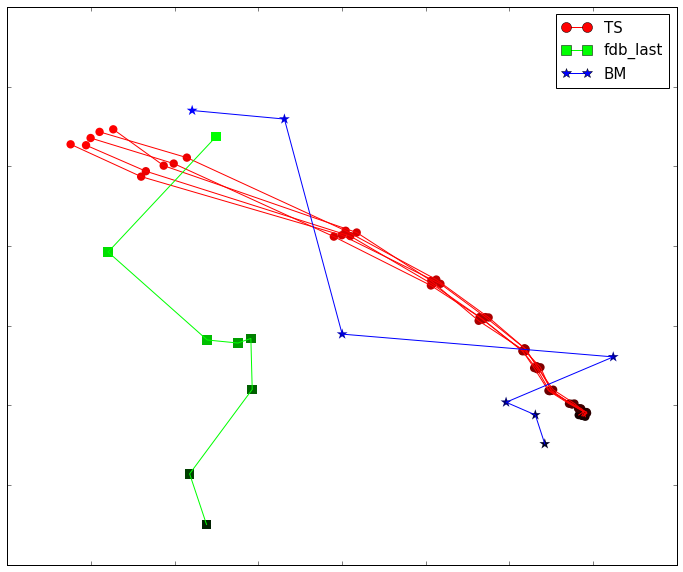

In [163]:
seed_now = seed_now + 1
dis_mat_objRDM = draw_RDM_embeding_pre(all_path_list, all_setting_list, mds_random_state = seed_now)

# Compute the new grouping

In [7]:
dis_mat = cPickle.load(open('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs/RDM_fc12_0.pkl', 'r'))

In [8]:
dis_mat.shape

(117, 117)

In [9]:
import sklearn.cluster as cluster
ap_ins = cluster.AffinityPropagation(damping = 0.9)

In [10]:
ap_ins.fit(dis_mat)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.9, max_iter=200, preference=None, verbose=False)

In [11]:
ret_res = ap_ins.fit_predict(dis_mat)

In [12]:
ret_res.shape

(117,)

In [13]:
ret_res

array([5, 0, 3, 3, 7, 8, 6, 0, 7, 1, 2, 8, 9, 0, 5, 4, 7, 9, 1, 0, 7, 1, 2,
       4, 5, 1, 2, 3, 6, 4, 3, 7, 2, 0, 7, 3, 2, 8, 1, 7, 7, 5, 9, 6, 7, 4,
       2, 4, 6, 5, 1, 2, 6, 5, 7, 7, 4, 7, 4, 6, 5, 2, 2, 7, 7, 4, 0, 8, 2,
       5, 2, 1, 9, 3, 4, 4, 6, 1, 2, 5, 8, 2, 0, 1, 8, 4, 7, 1, 9, 5, 7, 2,
       8, 2, 7, 9, 6, 6, 8, 3, 0, 7, 2, 1, 7, 7, 1, 0, 6, 1, 6, 0, 9, 6, 0,
       7, 1])

In [14]:
cate_info_path = '../cmd_gen_mp4/category_info.txt'

fin = open(cate_info_path, 'r')
lines = fin.readlines()

cate_dict = {}

for line in lines:
    split_line = line.split()
    indx_cate_now = int(split_line[0])
    label_inter = split_line[1]
    if label_inter[0]=='[':
        label_int = int(label_inter[3:11])
    else:
        label_int = int(label_inter[1:])
    
    syn_now = wn._synset_from_pos_and_offset('n',label_int)
    cate_dict[indx_cate_now] = syn_now.name().split('.')[0]

In [163]:
cate_dict

{0: u'cap',
 1: u'table-tennis_table',
 2: u'camera',
 3: u'school_bus',
 4: u'upright',
 5: u'data_input_device',
 6: u'floor_lamp',
 7: u'folding_chair',
 8: u'basket',
 9: u'drafting_table',
 10: u'limousine',
 11: u'remote_control',
 12: u'microphone',
 13: u'grand_piano',
 14: u'soda_can',
 15: u'ferry',
 16: u'birdhouse',
 17: u'earphone',
 18: u'kitchen_table',
 19: u'lawn_chair',
 20: u'platform_bed',
 21: u'secretary',
 22: u'ambulance',
 23: u'cabin_cruiser',
 24: u'coffee_mug',
 25: u'pool_table',
 26: u'stock_car',
 27: u'bag',
 28: u'dagger',
 29: u'sea_boat',
 30: u'pendulum_clock',
 31: u'vertical_file',
 32: u'roadster',
 33: u'rocking_chair',
 34: u'dishwasher',
 35: u'mailbox',
 36: u'jeep',
 37: u'pillow',
 38: u'piano',
 39: u'convertible',
 40: u'monitor',
 41: u'jar',
 42: u'sailboat',
 43: u'delta_wing',
 44: u'love_seat',
 45: u'cruise_ship',
 46: u'beach_wagon',
 47: u'yacht',
 48: u'revolver',
 49: u'mug',
 50: u'berth',
 51: u'wine_bottle',
 52: u'propeller_p

In [15]:
[cate_dict[ind] for ind, v in enumerate(ret_res) if v==9]

[u'microphone',
 u'earphone',
 u'sailboat',
 u'motorcycle',
 u'table_lamp',
 u'faucet',
 u'lamp']

# New visualization

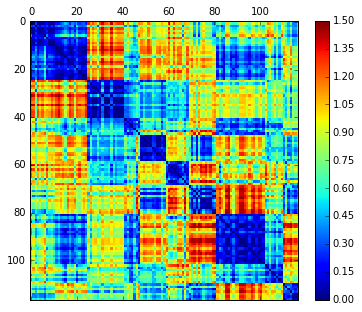

In [181]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs/RDM_fc12_0.pkl', with_rename=ret_res, fig_size=(6,5))

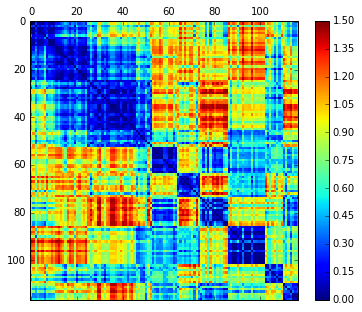

In [188]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs/RDM_fc12_0.pkl', 
              with_rename=ret_res, fig_size=(6,5), remap_arr = [0,1,7,3,4,5,6,2,8,9])

In [ ]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs/RDM_fc12_0.pkl', 
              with_rename=ret_res, fig_size=(6,5), remap_arr = [0,1,7,3,4,5,6,2,8,9])

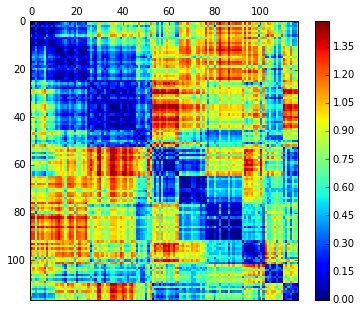

In [206]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs/RDM_fc12_0.pkl', 
              with_rename=ret_res, fig_size=(6,5), remap_arr = [0,1,7,3,6,4,2,5,8,9])

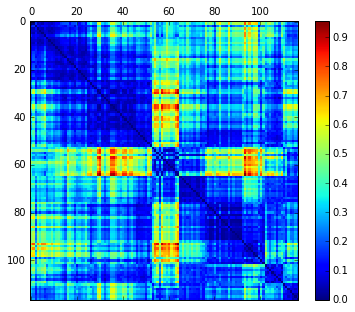

In [217]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs/RDM_conv10_0.pkl', 
              with_rename=ret_res, fig_size=(6,5), remap_arr = [0,1,7,3,6,4,2,5,8,9])

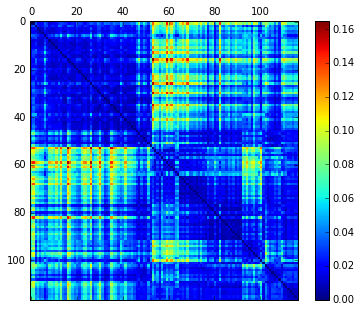

In [218]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs/RDM_conv1_0.pkl', 
              with_rename=ret_res, fig_size=(6,5), remap_arr = [0,1,7,3,6,4,2,5,8,9])

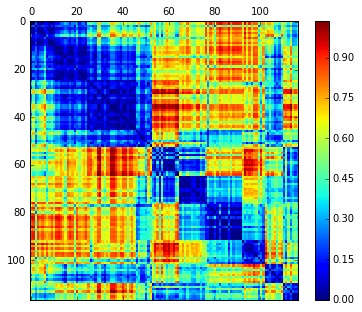

In [225]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/spatemp_RDMs/RDM_fc7_0.pkl', 
              with_rename=ret_res, fig_size=(6,5), remap_arr = [0,1,7,3,6,4,2,5,8,9])

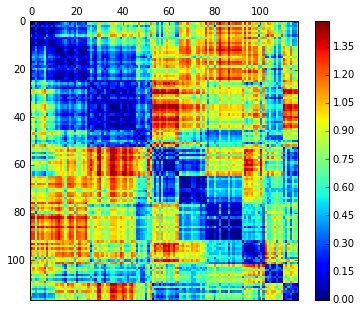

In [226]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs/RDM_fc12_0.pkl', 
              with_rename=ret_res, fig_size=(6,5), remap_arr = [0,1,7,3,6,4,2,5,8,9])

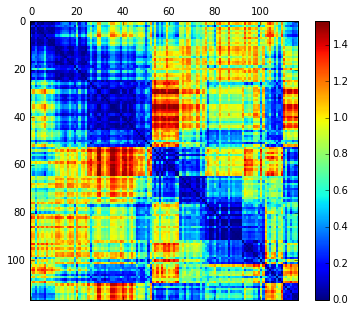

In [242]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/fdb_RDMs/RDM_fc8_21.pkl', 
              with_rename=ret_res, fig_size=(6,5), remap_arr = [0,1,7,3,6,4,2,5,8,9])

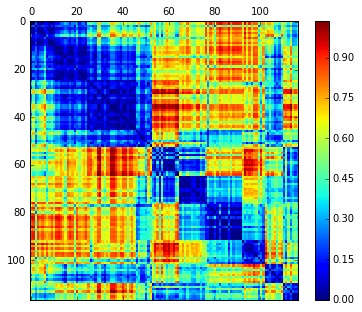

In [241]:
load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/spatemp_RDMs/RDM_fc7_0.pkl', 
              with_rename=ret_res, fig_size=(6,5), remap_arr = [0,1,7,3,6,4,2,5,8,9])

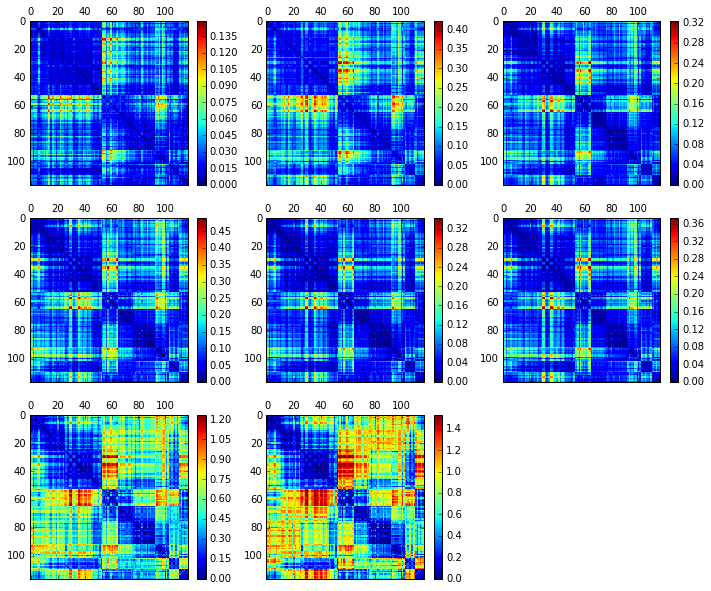

In [264]:
list_var_hi = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'conv6', 'fc7', 'fc8']

load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/fdb_RDMs/RDM_%s_21.pkl', 
              with_rename=ret_res, fig_size=(12,10), remap_arr = [0,1,7,3,6,4,2,5,8,9],
             subplot_sug = [3,3], list_var = list_var_hi)

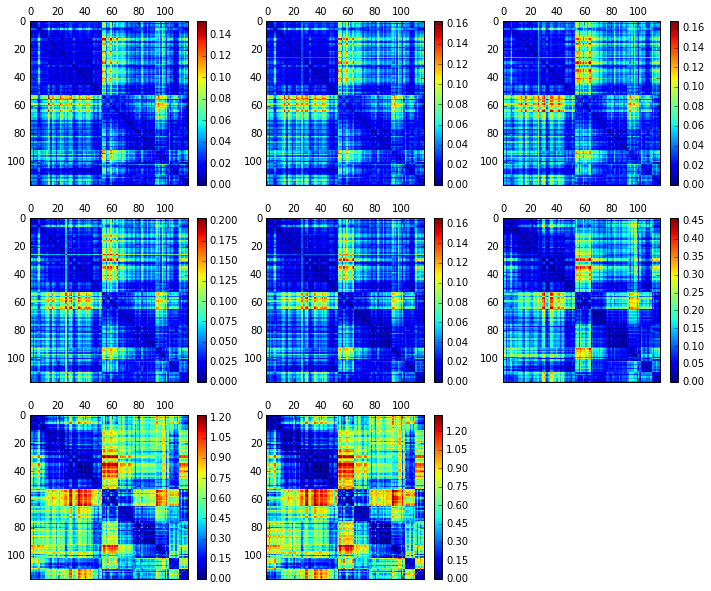

In [275]:
list_var_hi = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'conv6', 'fc7', 'fc8']

load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/tnn_RDMs/RDM_%s_21.pkl', 
              with_rename=ret_res, fig_size=(12,10), remap_arr = [0,1,7,3,6,4,2,5,8,9],
             subplot_sug = [3,3], list_var = list_var_hi)

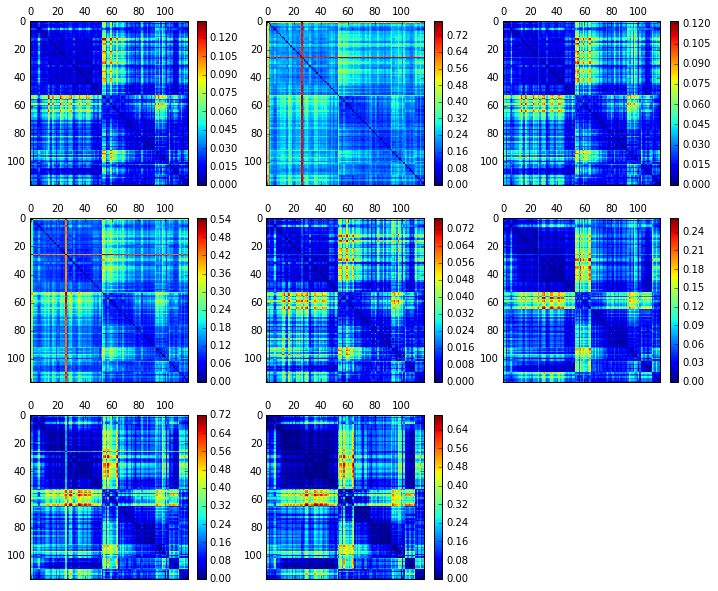

In [276]:
list_var_hi = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'conv6', 'fc7', 'fc8']

load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/byp_RDMs/RDM_%s_21.pkl', 
              with_rename=ret_res, fig_size=(12,10), remap_arr = [0,1,7,3,6,4,2,5,8,9],
             subplot_sug = [3,3], list_var = list_var_hi)

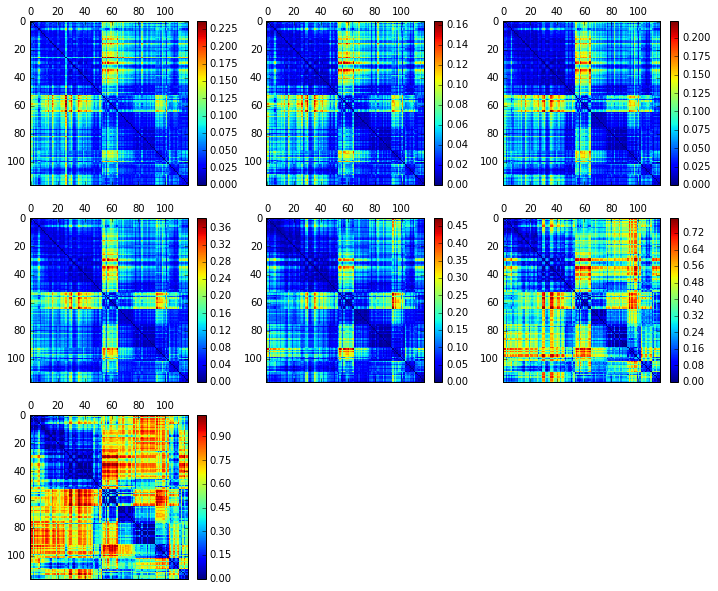

In [268]:
list_var_hi = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7']

load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/spatemp_RDMs/RDM_%s_0.pkl', 
              with_rename=ret_res, fig_size=(12,10), remap_arr = [0,1,7,3,6,4,2,5,8,9],
             subplot_sug = [3,3], list_var = list_var_hi)

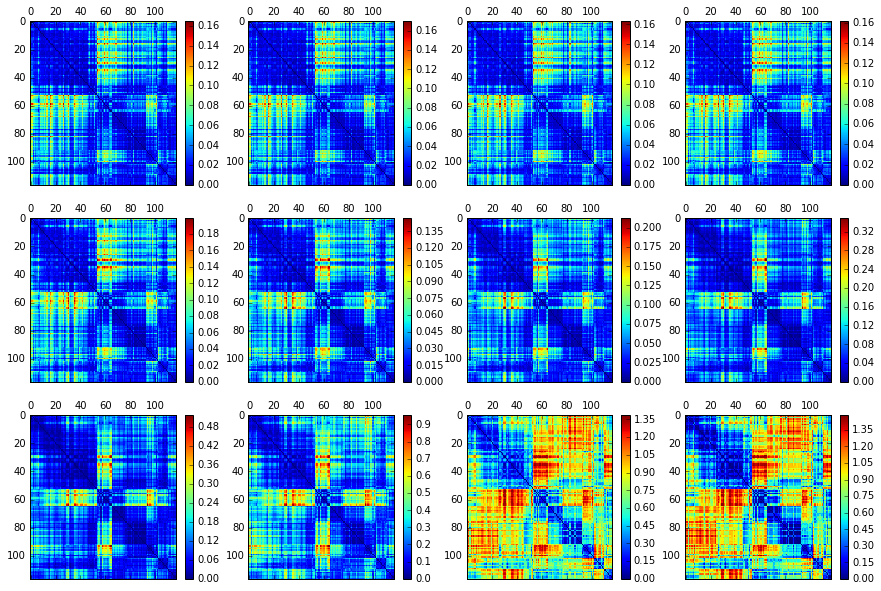

In [177]:
list_var_hi = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'conv6', 'conv7', 'conv8', 'conv9', 'conv10', 'fc11', 'fc12']

load_and_show('/mnt/data/chengxuz/barrel/val_RDMs/temp_spa_RDMs/RDM_%s_0.pkl', 
              with_rename=ret_res, fig_size=(15,10), remap_arr = [0,1,7,3,6,4,2,5,8,9],
             subplot_sug = [3,4], list_var = list_var_hi, save_fig = 'RDM.pdf')